# Survival Analysis with Scikit Survival

scikit-survival is a Python module for survival analysis built on top of scikit-learn. It allows doing survival analysis while utilizing the power of scikit-learn, e.g., for pre-processing or doing cross-validation.

# Dataset

## The Veterans' Administration Lung Cancer Trial

The Veterans' Administration Lung Cancer Trial is a randomized trial of two treatment regimens for lung cancer. The data set (Kalbfleisch J. and Prentice R, (1980) The Statistical Analysis of Failure Time Data. New York: Wiley) consists of 137 patients and 8 variables, which are discribed below:

* Treatment: denotes the type of lung cancer treatment; standard and test drug.
* Celltype: denotes the type of cell involved; squamous, small cell, adeno, large.
* Karnofsky_score: is the Karnofsky score.
* Diag: is the time since diagnosis in months.
* Age: is the age in years.
* Prior_Therapy: denotes any prior therapy; none or yes.
* Status: denotes the status of the patient as dead or alive; dead or alive.
* Survival_in_days: is the survival time in days since the treatment.

Our primary interest is studying whether there a subgroups that differ in survival and whether we can predict survival times.

Status and Survival_in_days need to be stored as a structured array with the first field indicating whether the actual survival time was observed or if was censored, and the second field denoting the observerd survival time, which corresponds to the time of death (if Status == 'dead', δ=1) or the last time that person was contacted (if Status == 'alive', δ=0).

In [1]:
from sksurv.datasets import load_veterans_lung_cancer
import pandas as pd

data_x, data_y = load_veterans_lung_cancer()

In [3]:
data_x.head()

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard


In [7]:
data_x.shape

(137, 6)

In [11]:
data_y[:5]

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.)],
      dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

We can easily see that only a small number of survival times are right-censored (Status is False), i.e., most veteran's died during the study period (Status is True).

# Non-Parametric Estimate: Kaplan Meier Estimator

In [16]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

%matplotlib inline

In [17]:
?kaplan_meier_estimator

Signature: kaplan_meier_estimator(event, time_exit, time_enter=None, time_min=None)
Docstring:
Kaplan-Meier estimator of survival function.

Parameters
----------
event : array-like, shape = (n_samples,)
    Contains binary event indicators.

time_exit : array-like, shape = (n_samples,)
    Contains event/censoring times.

time_enter : array-like, shape = (n_samples,), optional
    Contains time when each individual entered the study for
    left truncated survival data.

time_min : float, optional
    Compute estimator conditional on survival at least up to
    the specified time.

Returns
-------
time : array, shape = (n_times,)
    Unique times.

prob_survival : array, shape = (n_times,)
    Survival probability at each unique time point.
    If `time_enter` is provided, estimates are conditional probabilities.

Example
-------
Creating a Kaplan-Meier curve:

>>> x, y = kaplan_meier_estimator(event, time)
>>> plt.step(x, y, where="post")
>>> plt.ylim(0, 1)
>>> plt.show()

References

In [18]:
data_y['Status']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [19]:
data_y['Survival_in_days']

array([ 72., 411., 228., 126., 118.,  10.,  82., 110., 314., 100.,  42.,
         8., 144.,  25.,  11.,  30., 384.,   4.,  54.,  13., 123.,  97.,
       153.,  59., 117.,  16., 151.,  22.,  56.,  21.,  18., 139.,  20.,
        31.,  52., 287.,  18.,  51., 122.,  27.,  54.,   7.,  63., 392.,
        10.,   8.,  92.,  35., 117., 132.,  12., 162.,   3.,  95., 177.,
       162., 216., 553., 278.,  12., 260., 200., 156., 182., 143., 105.,
       103., 250., 100., 999., 112.,  87., 231., 242., 991., 111.,   1.,
       587., 389.,  33.,  25., 357., 467., 201.,   1.,  30.,  44., 283.,
        15.,  25., 103.,  21.,  13.,  87.,   2.,  20.,   7.,  24.,  99.,
         8.,  99.,  61.,  25.,  95.,  80.,  51.,  29.,  24.,  18.,  83.,
        31.,  51.,  90.,  52.,  73.,   8.,  36.,  48.,   7., 140., 186.,
        84.,  19.,  45.,  80.,  52., 164.,  19.,  53.,  15.,  43., 340.,
       133., 111., 231., 378.,  49.])

In [20]:
time, survival_prob = kaplan_meier_estimator(data_y['Status'], data_y['Survival_in_days'])

In [21]:
time

array([  1.,   2.,   3.,   4.,   7.,   8.,  10.,  11.,  12.,  13.,  15.,
        16.,  18.,  19.,  20.,  21.,  22.,  24.,  25.,  27.,  29.,  30.,
        31.,  33.,  35.,  36.,  42.,  43.,  44.,  45.,  48.,  49.,  51.,
        52.,  53.,  54.,  56.,  59.,  61.,  63.,  72.,  73.,  80.,  82.,
        83.,  84.,  87.,  90.,  92.,  95.,  97.,  99., 100., 103., 105.,
       110., 111., 112., 117., 118., 122., 123., 126., 132., 133., 139.,
       140., 143., 144., 151., 153., 156., 162., 164., 177., 182., 186.,
       200., 201., 216., 228., 231., 242., 250., 260., 278., 283., 287.,
       314., 340., 357., 378., 384., 389., 392., 411., 467., 553., 587.,
       991., 999.])

In [22]:
survival_prob

array([0.98540146, 0.97810219, 0.97080292, 0.96350365, 0.94160584,
       0.91240876, 0.89781022, 0.89051095, 0.87591241, 0.86131387,
       0.84671533, 0.83941606, 0.81751825, 0.80291971, 0.78832117,
       0.77372263, 0.76642336, 0.75182482, 0.72992701, 0.72255401,
       0.71518101, 0.70043501, 0.68568901, 0.67831601, 0.67094301,
       0.66357001, 0.65619701, 0.64882401, 0.64145101, 0.63407801,
       0.62670501, 0.61933201, 0.59721301, 0.57509401, 0.56772101,
       0.55297501, 0.54560201, 0.53822901, 0.53085601, 0.52348301,
       0.51611001, 0.50873701, 0.493991  , 0.486618  , 0.486618  ,
       0.47913157, 0.47164514, 0.46403796, 0.45643078, 0.44121642,
       0.44121642, 0.42573515, 0.41799451, 0.41010782, 0.40206649,
       0.39402516, 0.3779425 , 0.36990117, 0.35381851, 0.34577718,
       0.33773585, 0.33773585, 0.32949839, 0.32126093, 0.31302347,
       0.30478601, 0.29654855, 0.28831109, 0.28007363, 0.27183617,
       0.26359871, 0.25536125, 0.23888633, 0.23064887, 0.22241

Text(0.5,0,'time $t$')

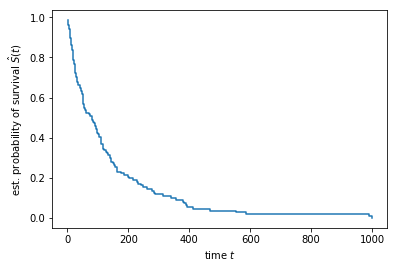

In [23]:
plt.step(time, survival_prob, where='post')
plt.ylabel('est. probability of survival $\hat{S}(t)$')
plt.xlabel('time $t$')

The estimated curve is a step function, with steps occuring at time points where one or more patients died. From the plot we can see that most patients died in the first 200 days, as indicated by the steep slope of the estimated survival function in the first 200 days.



In [31]:
pd.DataFrame(
    
{
   'Time': time,
    'Survival Prob': survival_prob
    
    
}, columns=['Time', 'Survival Prob']

)

,Time,Survival Prob
0,1.0,0.985401
1,2.0,0.978102
2,3.0,0.970803
3,4.0,0.963504
4,7.0,0.941606
5,8.0,0.912409
6,10.0,0.897810
7,11.0,0.890511
8,12.0,0.875912
9,13.0,0.861314


# Grouping by Other Variables

Roughly half the patients received the alternative treatment.

The obvious questions to ask is:

> Is there any difference between these two groups ?

## Treatment

In [34]:
data_x['Treatment'].value_counts()

standard    69
test        68
Name: Treatment, dtype: int64

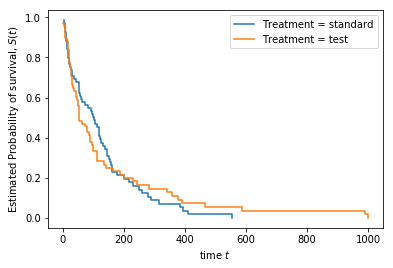

In [38]:
# Plot the two groups separately

for treatment_type in ['standard', 'test']:
    # select on roles with specific treatment
    mask_treat = data_x['Treatment'] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y['Status'][mask_treat],
        data_y['Survival_in_days'][mask_treat]
    )
    plt.step(time_treatment, survival_prob_treatment, where='post', label = 'Treatment = %s' % treatment_type)
    
plt.ylabel('Estimated Probability of survival, $S(t)$')
plt.xlabel("time $t$")
plt.legend(loc="best")

## Cell Type

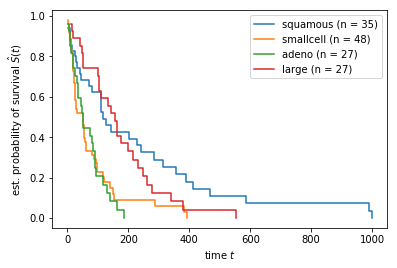

In [39]:
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["Status"][mask],
                                                           data_y["Survival_in_days"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In this case, we observe a pronounced difference between two groups. Patients with squamous or large cells seem to have a better prognosis compared to patients with small or adeno cells.

**Steeper gradient means faster rate of death**

# Multivariate Survival Models

In the Kaplan-Meier approach used above, we estimated multiple survival curves by dividing the dataset into smaller sub-groups according to a variable. If we want to consider more than 1 or 2 variables, this approach quickly becomes infeasible, because subgroups will get very small. Instead, we can use a linear model, Cox's proportional hazard's model, to estimate the impact each variable has on survival.

## One Hot Encoding

In [41]:
# Perform OHE as Cox Regression can't handle categorical

from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


## Cox Proportional Hazard

In [42]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [44]:
estimator.get_params()

{'alpha': 0, 'n_iter': 100, 'tol': 1e-09, 'verbose': 0}

In [48]:
# Log hazard ratio
pd.Series(estimator.coef_, index = data_x_numeric.columns).sort_values(ascending = False)

Treatment=test           0.289936
Prior_therapy=yes        0.072327
Months_from_Diagnosis   -0.000092
Age_in_years            -0.008549
Karnofsky_score         -0.032622
Celltype=smallcell      -0.331813
Celltype=large          -0.788672
Celltype=squamous       -1.188299
dtype: float64

* Risk of death is 0.3 times higher in Treatment = Test
* Risk of death is 1.2 times lower in celltype = squamous


## Predict Patient Specific Survival Function

In [49]:
x_new = pd.DataFrame.from_items(
    [(1, [65, 0, 0, 1, 60, 1, 0, 1]),
     (2, [65, 0, 0, 1, 60, 1, 0, 0]),
     (3, [65, 0, 1, 0, 60, 1, 0, 0]),
     (4, [65, 0, 1, 0, 60, 1, 0, 1])],
     columns=data_x_numeric.columns, orient='index')
x_new

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
1,65,0,0,1,60,1,0,1
2,65,0,0,1,60,1,0,0
3,65,0,1,0,60,1,0,0
4,65,0,1,0,60,1,0,1


In [50]:
pred_surv = estimator.predict_survival_function(x_new)

In [70]:
pred_surv

array([StepFunction(x=array([  1.,   2.,   3.,   4.,   7.,   8.,  10.,  11.,  12.,  13.,  15.,
        16.,  18.,  19.,  20.,  21.,  22.,  24.,  25.,  27.,  29.,  30.,
        31.,  33.,  35.,  36.,  42.,  43.,  44.,  45.,  48.,  49.,  51.,
        52.,  53.,  54.,  56.,  59.,  61.,  63.,  72.,  73.,  80.,  82.,
        83.,  84.,  87.,  90.,  92.,  95.,  97.,  99., 100., 103., 105.,
       110., 111., 112., 117., 118., 122., 123., 126., 132., 133., 139.,
       140., 143., 144., 151., 153., 156., 162., 164., 177., 182., 186.,
       200., 201., 216., 228., 231., 242., 250., 260., 278., 283., 287.,
       314., 340., 357., 378., 384., 389., 392., 411., 467., 553., 587.,
       991., 999.]), y=array([0.99434242, 0.99147904, 0.98857541, 0.98561186, 0.97665739,
       0.96418099, 0.9576397 , 0.95430954, 0.94766847, 0.94093389,
       0.93404319, 0.93054128, 0.91989204, 0.91229923, 0.90441587,
       0.89617021, 0.89183372, 0.88315163, 0.86968009, 0.86494784,
       0.86019462, 0.85053113,

**extracting step functions**

https://github.com/sebp/scikit-survival/issues/30

In [79]:
time_point = 1
for i, f in enumerate(pred_surv):
    val = f(time_point)
    print("Surv function at {} for patient {} = {}".format(time_point, i, val))

Surv function at 1 for patient 0 = 0.9943424217109322
Surv function at 1 for patient 1 = 0.9957633474574168
Surv function at 1 for patient 2 = 0.9900518423723645
Surv function at 1 for patient 3 = 0.986728151274063


In [85]:
# accessing the data
pred_surv[0].x

array([  1.,   2.,   3.,   4.,   7.,   8.,  10.,  11.,  12.,  13.,  15.,
        16.,  18.,  19.,  20.,  21.,  22.,  24.,  25.,  27.,  29.,  30.,
        31.,  33.,  35.,  36.,  42.,  43.,  44.,  45.,  48.,  49.,  51.,
        52.,  53.,  54.,  56.,  59.,  61.,  63.,  72.,  73.,  80.,  82.,
        83.,  84.,  87.,  90.,  92.,  95.,  97.,  99., 100., 103., 105.,
       110., 111., 112., 117., 118., 122., 123., 126., 132., 133., 139.,
       140., 143., 144., 151., 153., 156., 162., 164., 177., 182., 186.,
       200., 201., 216., 228., 231., 242., 250., 260., 278., 283., 287.,
       314., 340., 357., 378., 384., 389., 392., 411., 467., 553., 587.,
       991., 999.])

In [86]:
pred_surv[0].y

array([0.99434242, 0.99147904, 0.98857541, 0.98561186, 0.97665739,
       0.96418099, 0.9576397 , 0.95430954, 0.94766847, 0.94093389,
       0.93404319, 0.93054128, 0.91989204, 0.91229923, 0.90441587,
       0.89617021, 0.89183372, 0.88315163, 0.86968009, 0.86494784,
       0.86019462, 0.85053113, 0.84083699, 0.83594151, 0.83099732,
       0.82593766, 0.8208327 , 0.81573874, 0.81061804, 0.8054964 ,
       0.80020353, 0.79438666, 0.77653941, 0.75734964, 0.75066398,
       0.73729566, 0.73056539, 0.72382336, 0.71684145, 0.70981753,
       0.70266469, 0.69553199, 0.68102242, 0.6730912 , 0.6730912 ,
       0.66501962, 0.65686046, 0.64848709, 0.639776  , 0.62227172,
       0.62227172, 0.6039543 , 0.59462978, 0.58515073, 0.57534312,
       0.56560594, 0.54650172, 0.53682307, 0.51779554, 0.50806828,
       0.49841863, 0.49841863, 0.48802455, 0.47767068, 0.46721409,
       0.45677755, 0.44635876, 0.43558581, 0.42496071, 0.4140562 ,
       0.40274746, 0.39113731, 0.36839571, 0.35688541, 0.34532

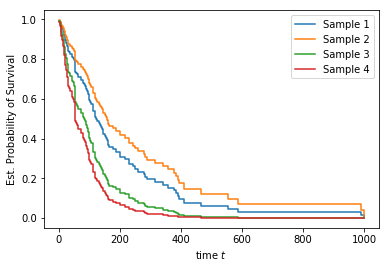

In [87]:
for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where='post', label='Sample %d'%(i+1))
    
plt.ylabel('Est. Probability of Survival')
plt.xlabel('time $t$')
plt.legend(loc='best')

Clearly sample 4 has highest risk of death

## Predicting Risk Scores

predictions are risk scores on an arbitrary scale, which means you can 
usually only determine the sequence of events, but not their exact time.

In [53]:
pred_test = estimator.predict(x_new)

In [64]:
pred_test

array([-3.41147108, -3.70140696, -2.84492031, -2.55498443])

# Measuring Performance

Once we fit a survival model, we usually want to assess how well a model can actually predict survival. Our test data is usually subject to censoring too, therefore metrics like root mean squared error or correlation are unsuitable. Instead, we use generalization of the area under the receiver operating characteristic (ROC) curve called Harrell's concordance index or c-index.

The interpretation is identical to the traditional area under the ROC curve metric for binary classification:

a value of 0.5 denotes a random model,
a value of 1.0 denotes a perfect model,
a value of 0.0 denotes a perfectly wrong model.

In [89]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(data_x_numeric)
result = concordance_index_censored(data_y['Status'], data_y['Survival_in_days'], prediction)

In [93]:
result[0]

0.7362562471603816

In [94]:
estimator.score(data_x_numeric, data_y)

0.7362562471603816

# Feature Selection: Which Variable is Most Predictive?


The model above considered all available variables for prediction. Next, we want to investigate which single variable is the best risk predictor. Therefore, we fit a Cox model to each variable individually and record the c-index on the training set.

In [95]:
import numpy as np

def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj,y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(data_x_numeric.values, data_y)
pd.Series(scores, index = data_x_numeric.columns).sort_values(ascending = False)

Karnofsky_score          0.709280
Celltype=smallcell       0.572581
Celltype=large           0.561620
Celltype=squamous        0.550545
Treatment=test           0.525386
Age_in_years             0.515107
Months_from_Diagnosis    0.509030
Prior_therapy=yes        0.494434
dtype: float64

Karnofsky_score is the best variable, whereas Months_from_Diagnosis and Prior_therapy='yes' have almost no predictive power on their own.

Next, we want to build a parsimonious model by excluding irrelevant features. We could use the ranking from above, but would need to determine what the optimal cut-off should be. Luckily, scikit-learn has built-in support for performing grid search.

First, we create a pipeline that puts all the parts together.

# Feature Selection using KBest

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [99]:
# Build pipeline

pipe = Pipeline(

    [
        ('encode', OneHotEncoder()),
        ('select', SelectKBest(fit_and_score_features, k=3)),
        ('model', CoxPHSurvivalAnalysis())
        
    ]

)

In [100]:
pipe

Pipeline(memory=None,
     steps=[('encode', OneHotEncoder(allow_drop=True)), ('select', SelectKBest(k=3,
      score_func=<function fit_and_score_features at 0x7f7118a956a8>)), ('model', CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0))])

Next, we need to define the range of parameters we want to explore during grid search. Here, we want to optimize the parameter k of the SelectKBest class and allow k to vary from 1 feature to all 8 features.

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {'select__k': np.arange(1, data_x_numeric.shape[1]+1)}

In [105]:
gcv = GridSearchCV(pipe, param_grid)

In [106]:
gcv.fit(data_x, data_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('encode', OneHotEncoder(allow_drop=True)), ('select', SelectKBest(k=3,
      score_func=<function fit_and_score_features at 0x7f7118a956a8>)), ('model', CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'select__k': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)

/home/jasonchan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jasonchan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jasonchan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jasonchan/anaconda

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_select__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,0.110535,0.063072,0.707491,0.725099,3,{'select__k': 3},1,0.650628,0.765569,0.718220,0.695647,0.754649,0.714082,0.006096,0.081474,0.043067,0.029590
4,0.110460,0.005819,0.703834,0.733551,5,{'select__k': 5},2,0.644874,0.783946,0.738347,0.698207,0.728822,0.718498,0.006892,0.000468,0.042098,0.036585
3,0.110363,0.005552,0.698523,0.722162,4,{'select__k': 4},3,0.650628,0.768121,0.719809,0.691037,0.725723,0.707327,0.007184,0.000153,0.034138,0.033172
1,0.110203,0.006141,0.698256,0.715933,2,{'select__k': 2},4,0.630753,0.758550,0.717161,0.683611,0.747934,0.705638,0.009094,0.000717,0.049604,0.031448
0,0.121416,0.005532,0.693982,0.705527,1,{'select__k': 1},5,0.630753,0.744640,0.715042,0.676697,0.737087,0.695246,0.019986,0.000039,0.045843,0.028675
5,0.111705,0.005784,0.683572,0.732985,6,{'select__k': 6},6,0.657427,0.783946,0.669492,0.698848,0.724690,0.716160,0.008365,0.000241,0.029179,0.036722
6,0.115845,0.005923,0.676269,0.732021,7,{'select__k': 7},7,0.654812,0.788412,0.659958,0.695519,0.714876,0.712133,0.011533,0.000111,0.027083,0.040447
7,0.114594,0.005795,0.675516,0.731690,8,{'select__k': 8},8,0.656904,0.786371,0.653602,0.695006,0.716942,0.713692,0.007944,0.000135,0.029004,0.039411


In [112]:
# predict using best params

pipe.set_params(**gcv.best_params_)
pipe.fit(data_x, data_y)



Pipeline(memory=None,
     steps=[('encode', OneHotEncoder(allow_drop=True)), ('select', SelectKBest(k=3,
      score_func=<function fit_and_score_features at 0x7f7118a956a8>)), ('model', CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0))])

In [114]:
encoder, transformer, final_estimator = [s[1] for s in pipe.steps]


In [115]:
pd.Series(final_estimator.coef_, index=encoder.encoded_columns_[transformer.get_support()])


Celltype=large       -0.067277
Celltype=smallcell    0.271007
Karnofsky_score      -0.031285
dtype: float64